In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import PIL
import random

In [2]:
GLOBAL_ARRAY = []

In [3]:
len(GLOBAL_ARRAY)

0

In [4]:
data_directory_labels = "/Users/veronika/Documents/diplomski2021/proba/train_labels"
data_directory_images = "/Users/veronika/Documents/diplomski2021/proba/train_images"

In [5]:
classes = {'unknown': (0,0,0),'smoke': (23, 23, 23), 'clouds and fog': (46, 46, 46), 'sun and sun effects': (69, 69, 69), 'sky': (92, 92, 92), 'sea': (115, 115, 115), 'distant landscape': (138, 138, 138), 'rocks': (161, 161, 161), 'distant vegetation': (184, 184, 184), 'close vegetation': (207, 207, 207), 'low vegetation and farms': (230, 230, 230), 'buildings': (253, 253, 253)}

In [6]:
list_of_class_names= []
list_of_RGBs = []

for element in classes:
    # print(element)
    list_of_class_names.append(element)
    RGB_value = classes.get(element)
    # print(RGB_value)
    list_of_RGBs.append(RGB_value)

# print(list_of_class_names)
# print(list_of_RGBs)

In [7]:
my_images = []
dirFiles = os.listdir(data_directory_images)
dirFiles.sort()
print(sorted(dirFiles))

for files in dirFiles: #filter out all non jpgs
    if '.jpg' in files:
        # ovaj niz sadrži samo imena slika iz foldera sa .jpg slikama
        my_images.append(files)
print(len(my_images))
# print(my_images)

['.DS_Store', 'src_1.jpg', 'src_11.jpg', 'src_12.jpg', 'src_14.jpg', 'src_15.jpg', 'src_16.jpg', 'src_17.jpg', 'src_18.jpg', 'src_19.jpg', 'src_21.jpg', 'src_22.jpg', 'src_23.jpg', 'src_24.jpg', 'src_25.jpg', 'src_26.jpg', 'src_27.jpg', 'src_28.jpg', 'src_32.jpg', 'src_33.jpg', 'src_34.jpg', 'src_36.jpg', 'src_37.jpg', 'src_38.jpg', 'src_39.jpg', 'src_4.jpg', 'src_40.jpg', 'src_44.jpg', 'src_45.jpg', 'src_46.jpg', 'src_47.jpg', 'src_48.jpg', 'src_5.jpg', 'src_51.jpg', 'src_52.jpg', 'src_53.jpg', 'src_56.jpg', 'src_61.jpg', 'src_63.jpg', 'src_64.jpg', 'src_66.jpg', 'src_68.jpg', 'src_7.jpg', 'src_70.jpg', 'src_71.jpg', 'src_73.jpg', 'src_76.jpg', 'src_78.jpg', 'src_8.jpg', 'src_81.jpg', 'src_82.jpg', 'src_83.jpg', 'src_85.jpg', 'src_86.jpg', 'src_88.jpg', 'src_89.jpg', 'src_90.jpg']
56


In [10]:
my_labels_images = []
dirFiles = os.listdir(data_directory_labels)
dirFiles.sort()
print(sorted(dirFiles))

for files in dirFiles:
    if '.bmp' in files:
        my_labels_images.append(files)
print(len(my_labels_images))
#print(my_labels_images)

['.DS_Store', 'gt_1.bmp', 'gt_11.bmp', 'gt_12.bmp', 'gt_14.bmp', 'gt_15.bmp', 'gt_16.bmp', 'gt_17.bmp', 'gt_18.bmp', 'gt_19.bmp', 'gt_21.bmp', 'gt_22.bmp', 'gt_23.bmp', 'gt_24.bmp', 'gt_25.bmp', 'gt_26.bmp', 'gt_27.bmp', 'gt_28.bmp', 'gt_32.bmp', 'gt_33.bmp', 'gt_34.bmp', 'gt_36.bmp', 'gt_37.bmp', 'gt_38.bmp', 'gt_39.bmp', 'gt_4.bmp', 'gt_40.bmp', 'gt_44.bmp', 'gt_45.bmp', 'gt_46.bmp', 'gt_47.bmp', 'gt_48.bmp', 'gt_5.bmp', 'gt_51.bmp', 'gt_52.bmp', 'gt_53.bmp', 'gt_56.bmp', 'gt_61.bmp', 'gt_63.bmp', 'gt_64.bmp', 'gt_66.bmp', 'gt_68.bmp', 'gt_7.bmp', 'gt_70.bmp', 'gt_71.bmp', 'gt_73.bmp', 'gt_76.bmp', 'gt_78.bmp', 'gt_8.bmp', 'gt_81.bmp', 'gt_82.bmp', 'gt_83.bmp', 'gt_85.bmp', 'gt_86.bmp', 'gt_88.bmp', 'gt_89.bmp', 'gt_90.bmp']
56


In [11]:
train_labels_colors = []

def get_all_colors(lables_list, path_to_array, list_to_save_to):
    for img in lables_list:
        path_string = os.path.join(path_to_array, img)
        colors = PIL.Image.open(path_string).getcolors(256)

        list_to_save_to.append(colors)

# ekstrahiranje klasa iz gt slika

print("extracting classes from sorted train lables array...\n")
get_all_colors(my_labels_images, data_directory_labels, train_labels_colors)
print(len(train_labels_colors))

extracting classes from sorted train lables array...

56


In [12]:
# izvlačenje samo RGB vrijednosti i njihovo spremanje u niz

train_labels_list = []

def colors_to_list(list_with_tuples, list_to_save_to):
    for color in range(len(list_with_tuples)):
        temp_list = []
        for class_color in range(len(list_with_tuples[color])):
            temp_list.append(list_with_tuples[color][class_color][1])
        list_to_save_to.append(temp_list)

print("extracting only the RGB values for train labels...")
colors_to_list(train_labels_colors, train_labels_list)
print(f"Train labels list has {len(train_labels_list)} elements\n")

extracting only the RGB values for train labels...
Train labels list has 56 elements



In [13]:
# input list sadrži (x, x, x) elemente
# train_labels_for_one = []

def one_hot_encoding (input_list, list_of_RGBS):
    output_list = []
    # print(output_list)
    for element in range(len(list_of_RGBs)):
        if list_of_RGBs[element] in input_list: # ako je element iz RGB-a u ulaznoj listi
            # print(list_of_RGBs[element])
            # print(input_list)
            # print("There is a value")
            output_list.append(1) # na taj indeks stavi jedinicu
        else:
            output_list.append(0)
        # print(output_list)
    GLOBAL_ARRAY.append(output_list)

In [14]:
for element in range(len(train_labels_list)):
    one_hot_encoding(train_labels_list[element], list_of_RGBs)

In [15]:
len(GLOBAL_ARRAY)

56

In [16]:
type(GLOBAL_ARRAY[1])

list

In [17]:
for temp in range(3):
    print(GLOBAL_ARRAY[temp])

[1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1]
[1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1]


In [36]:
training_data = []

def create_training_data():
    for image in range(len(my_images)):
        path = data_directory_images
        try:
            img_array = cv2.imread(os.path.join(path, my_images[image]))
            new_array = cv2.resize(img_array, (100, 100))
            label = GLOBAL_ARRAY[image]
            # plt.imshow(new_array)
            # plt.show()

            training_data.append([new_array, label])
            # print(training_data[image][1])
        except Exception as e:
            pass

create_training_data()

In [19]:
print(len(training_data))

56


In [20]:
type(training_data)

list

In [21]:
type(training_data[0])

list

In [19]:
print(training_data[0])

[array([[[238, 209, 172],
        [239, 209, 172],
        [239, 210, 173],
        ...,
        [185, 175, 157],
        [186, 174, 156],
        [186, 174, 156]],

       [[239, 210, 173],
        [240, 211, 174],
        [240, 211, 175],
        ...,
        [186, 175, 157],
        [186, 175, 157],
        [186, 174, 156]],

       [[238, 209, 172],
        [238, 209, 172],
        [239, 210, 173],
        ...,
        [187, 175, 157],
        [187, 175, 157],
        [187, 175, 157]],

       ...,

       [[127, 109,  78],
        [120, 102,  71],
        [117,  99,  68],
        ...,
        [ 95,  84,  57],
        [ 97,  86,  59],
        [103,  92,  65]],

       [[128, 111,  78],
        [132, 114,  82],
        [124, 107,  75],
        ...,
        [ 99,  88,  61],
        [101,  90,  63],
        [103,  92,  65]],

       [[129, 112,  79],
        [122, 105,  72],
        [126, 109,  76],
        ...,
        [ 91,  80,  53],
        [ 81,  69,  42],
        [ 70,  59,  32]

In [22]:
type(training_data[0][0])

numpy.ndarray

In [23]:
type(training_data[0][1])

list

In [24]:
random.shuffle(training_data)

In [37]:
for sample in range(len(training_data[:3])):
    print(training_data[sample][1])

[1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1]
[1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1]


In [21]:
len(training_data)

56

In [26]:
print(training_data[1][1])

[1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0]


In [27]:
print(training_data[2][1])

[1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0]


In [24]:
print(training_data[2][0])

[[[  4   4   4]
  [  3   3   3]
  [  6   6   6]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[ 10  10  10]
  [  0   0   0]
  [  1   1   1]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  2   2   2]
  [ 38  38  38]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 ...

 [[ 87  99 123]
  [104 114 138]
  [156 166 189]
  ...
  [ 73  77  72]
  [ 51  53  47]
  [  8   9   5]]

 [[114 123 146]
  [125 135 157]
  [148 158 179]
  ...
  [ 78  83  80]
  [ 52  56  53]
  [  6   7   6]]

 [[180 187 206]
  [190 198 216]
  [183 192 209]
  ...
  [ 89  97  99]
  [ 59  65  68]
  [  7  10  13]]]


In [25]:
len(training_data)

56

In [38]:
# pretvorba slika i labela u numpy array
train_images = []
train_labels = []

for features, label in training_data:
    train_images.append(features)
    train_labels.append(label)

# -1 -> any feature
# 1 -> grayscale
train_labels = np.array(train_labels)
train_images = np.array(train_images)

In [29]:
len(train_labels)

56

In [30]:
type(train_labels)

numpy.ndarray

In [31]:
type(train_images)

numpy.ndarray

In [32]:
len(train_images)

56

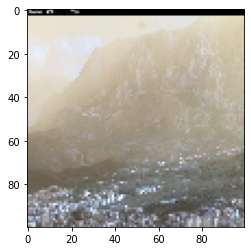

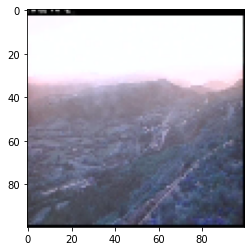

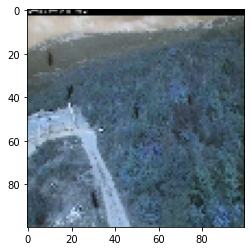

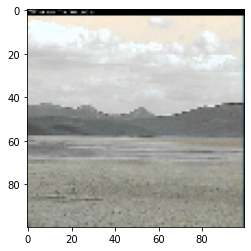

In [39]:
for image in train_images[3:7]:
    plt.imshow(image)
    plt.show()
    #print(train_labels[image])

In [40]:
np.save('images-proba.npy', train_images)

In [42]:
np.save('labels-proba.npy', train_labels)

In [44]:
images_proba = np.load('images-proba.npy')

In [45]:
labels_proba = np.load('labels-proba.npy')

In [46]:
len(images_proba)

56

In [47]:
len(labels_proba)

56